<a href="https://colab.research.google.com/github/vinayshanbhag/math/blob/master/Fourier_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
def sinusoid(f, phase=0, dur=3.0, sr=22050):
  ts = int(dur*sr)
  spc = int(sr/f)
  pts = np.linspace(phase, 2*np.pi*ts/spc+ phase, ts)
  return np.sin(pts)

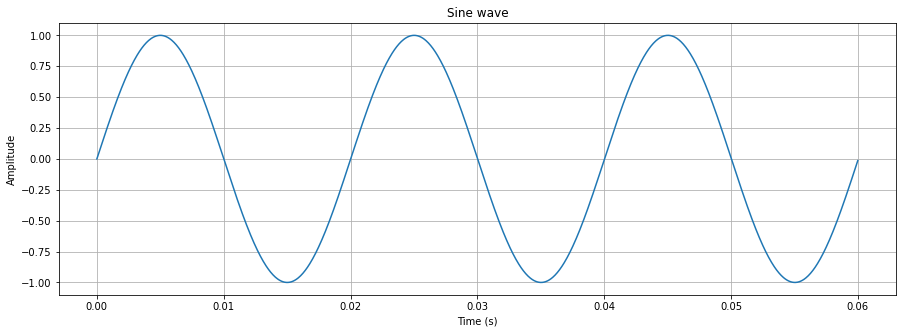

In [3]:
f = 50
sr=22050
y = sinusoid(f=f, phase=0,dur=3.0, sr=sr)
plot_lim = sr//f*3
plt.figure(figsize=(15,5))

x = np.linspace(0, len(y[:plot_lim])/sr, len(y[:plot_lim]))

plt.plot(x, y[:plot_lim])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid();
plt.title('Sine wave');

In [4]:
Audio(y,rate=sr)

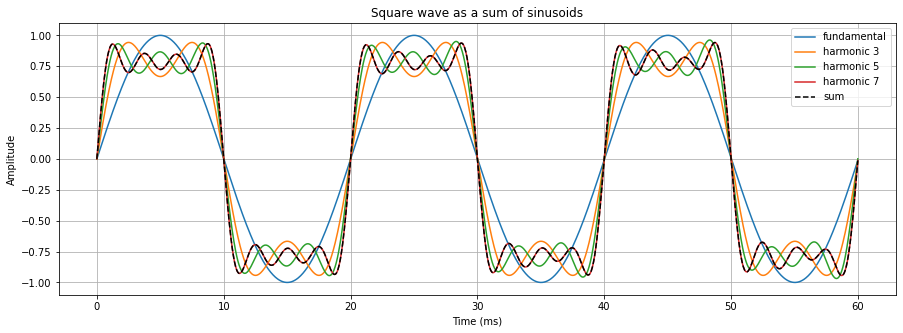

In [5]:
dur=3.0
sr=22050
s=[]
fbase=50
plot_lim = int(sr/fbase*3)
plt.figure(figsize=(15,5))
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.grid()

for i in range(1,8,2):
  f = fbase*i
  if len(s):
    s=s+(sinusoid(f, dur=dur, sr=sr))/(i)
  else:
    s = sinusoid(f, dur=dur, sr=sr)/i
  x = np.linspace(0, len(s[:plot_lim])/sr, len(s[:plot_lim]))
  plt.plot(x*1000, s[:plot_lim], label=f'harmonic {i}' if i>1 else 'fundamental')  
x = np.linspace(0, len(s[:plot_lim])/sr, len(s[:plot_lim]))
plt.plot(x*1000, s[:plot_lim], 'k--', label='sum')
plt.title('Square wave as a sum of sinusoids')
plt.legend();


In [6]:
Audio(s, rate=sr)

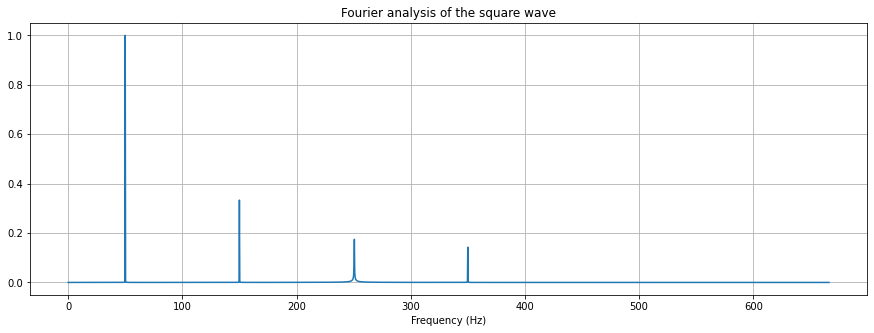

In [7]:
N = len(s)
T = 1.0 / sr
yf = np.fft.fft(s)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(15,5))
plot_lim = fbase*20*2
plt.plot(xf[:plot_lim], (2/N*np.abs(yf[:N//2]))[:plot_lim])
plt.title('Fourier analysis of the square wave')
plt.xlabel("Frequency (Hz)")
plt.grid()
plt.show()

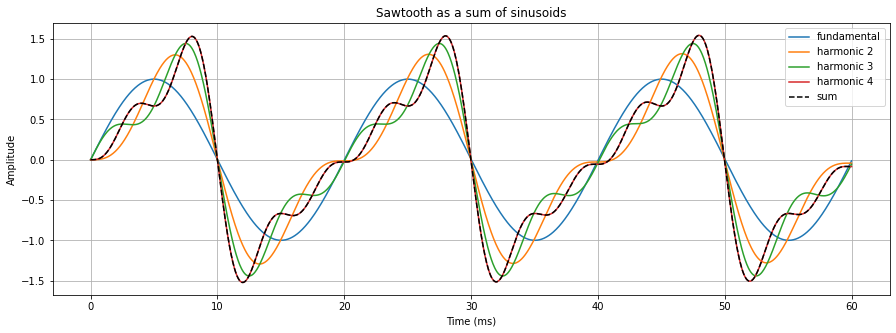

In [8]:
dur=3.0
sr=22050
s=[]
fbase=50
plot_lim = int(sr/fbase*3)
plt.figure(figsize=(15,5))
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.grid()

for i in range(1,5,1):
  f = fbase*i
  if len(s):
    if i%2:
      s=s+(sinusoid(f, dur=dur, sr=sr))/(i)
    else:
      s=s-(sinusoid(f, dur=dur, sr=sr))/(i)
  else:
    s = sinusoid(f, dur=dur, sr=sr)/i
  x = np.linspace(0, len(s[:plot_lim])/sr, len(s[:plot_lim]))
  plt.plot(x*1000, s[:plot_lim], label=f'harmonic {i}' if i>1 else 'fundamental')  
x = np.linspace(0, len(s[:plot_lim])/sr, len(s[:plot_lim]))
plt.plot(x*1000, s[:plot_lim], 'k--', label='sum')
plt.title('Sawtooth as a sum of sinusoids')
plt.legend();

In [9]:
Audio(s, rate=sr)

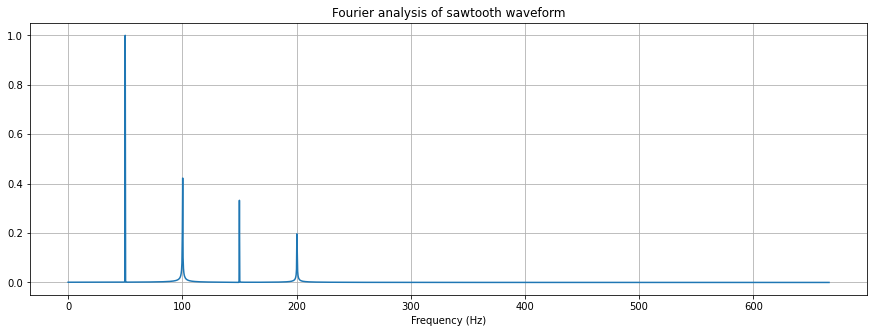

In [10]:
N = len(s)
T = 1.0 / sr
yf = np.fft.fft(s)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(15,5))
plot_lim = fbase*20*2
plt.plot(xf[:plot_lim], (2/N*np.abs(yf[:N//2]))[:plot_lim])
plt.title('Fourier analysis of sawtooth waveform')
plt.xlabel("Frequency (Hz)")
plt.grid()
plt.show()